# Importing Streaming Platform Data

### Step 1

I ventured to Kaggle to find data on what Movies can be found on which streaming platforms. I found a very handy list of over 16,000 movies and their appearance on 4 popular streaming sites - Netflix, hulu, Prime Video, and Dinsey+.

In [1]:
import pandas as pd
movies = pd.read_csv('data/MoviesOnStreamingPlatforms_updated.csv')
movies


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


I wanted to take a look at what was in my data and decided to 

In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [3]:
display(movies.loc[movies['Title'] == 'Avengers: Infinity War'])

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0


In [4]:
movies = movies.dropna(subset = ['Rotten Tomatoes'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5158 entries, 0 to 16719
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5158 non-null   int64  
 1   ID               5158 non-null   int64  
 2   Title            5158 non-null   object 
 3   Year             5158 non-null   int64  
 4   Age              3371 non-null   object 
 5   IMDb             5156 non-null   float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          5158 non-null   int64  
 8   Hulu             5158 non-null   int64  
 9   Prime Video      5158 non-null   int64  
 10  Disney+          5158 non-null   int64  
 11  Type             5158 non-null   int64  
 12  Directors        5052 non-null   object 
 13  Genres           5153 non-null   object 
 14  Country          5139 non-null   object 
 15  Language         5111 non-null   object 
 16  Runtime          5122 non-null   float64
dtypes: float64(2)

In [5]:
movies['Rotten Tomatoes'].str.replace("%","").astype(int)

0        87
1        87
2        84
3        96
4        97
         ..
16671    17
16677    13
16687     6
16705     7
16719    55
Name: Rotten Tomatoes, Length: 5158, dtype: int64

Trying to sort best movies available on streaming platforms.

In [6]:
movies = movies.sort_values('Rotten Tomatoes', ascending=False)
movies

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4663,4663,4664,Blow the Man Down,2019,18+,6.4,99%,0,0,1,0,0,"Bridget Savage Cole,Danielle Krudy","Comedy,Drama,Mystery",United States,English,91.0
4466,4466,4467,The Wailing,2016,18+,7.5,99%,0,0,1,0,0,Hong-jin Na,"Horror,Mystery,Thriller","South Korea,United States","Korean,Japanese",156.0
3739,3739,3740,Gloria,2013,18+,6.8,99%,0,1,0,0,0,Edward Zwick,"Biography,Drama,History,War",United States,English,122.0
3708,3708,3709,Amazing Grace,2018,all,7.5,99%,0,1,0,0,0,Michael Apted,"Biography,Drama,History,Romance","United States,United Kingdom",English,118.0
3764,3764,3765,Nothing Like a Dame,2018,NaN,7.3,99%,0,1,0,0,0,Roger Michell,Documentary,United Kingdom,English,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,6403,6404,Bad Kids of Crestview Academy,2017,18+,5.6,10%,0,0,1,0,0,Ben Browder,"Action,Comedy,Thriller",United States,English,100.0
6036,6036,6037,Killers,2010,13+,5.4,10%,0,0,1,0,0,Robert Luketic,"Action,Comedy,Romance,Thriller",United States,English,100.0
2181,2181,2182,Krystal,2018,18+,5.4,10%,1,0,0,0,0,William H. Macy,"Comedy,Drama",United States,English,90.0
7203,7203,7204,Begum Jaan,2017,18+,5.6,10%,0,0,1,0,0,Srijit Mukherji,"Action,Drama,History",India,Hindi,128.0


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5158 entries, 4663 to 1419
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5158 non-null   int64  
 1   ID               5158 non-null   int64  
 2   Title            5158 non-null   object 
 3   Year             5158 non-null   int64  
 4   Age              3371 non-null   object 
 5   IMDb             5156 non-null   float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          5158 non-null   int64  
 8   Hulu             5158 non-null   int64  
 9   Prime Video      5158 non-null   int64  
 10  Disney+          5158 non-null   int64  
 11  Type             5158 non-null   int64  
 12  Directors        5052 non-null   object 
 13  Genres           5153 non-null   object 
 14  Country          5139 non-null   object 
 15  Language         5111 non-null   object 
 16  Runtime          5122 non-null   float64
dtypes: float64(

In [8]:
top_movies = movies.sort_values('Rotten Tomatoes', ascending=False).head(500)
top_movies

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4663,4663,4664,Blow the Man Down,2019,18+,6.4,99%,0,0,1,0,0,"Bridget Savage Cole,Danielle Krudy","Comedy,Drama,Mystery",United States,English,91.0
4534,4534,4535,I Am Not Your Negro,2017,18+,7.8,99%,0,0,1,0,0,Raoul Peck,Documentary,"Switzerland,France,Belgium,United States","English,French",93.0
4466,4466,4467,The Wailing,2016,18+,7.5,99%,0,0,1,0,0,Hong-jin Na,"Horror,Mystery,Thriller","South Korea,United States","Korean,Japanese",156.0
4447,4447,4448,Lady Bird,2017,18+,7.4,99%,0,0,1,0,0,Greta Gerwig,"Comedy,Drama",United States,"English,Spanish",94.0
3584,3584,3585,Shoplifters,2018,18+,8.0,99%,0,1,0,0,0,Hirokazu Koreeda,"Crime,Drama",Japan,Japanese,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,3636,3637,Risky Business,1983,18+,6.8,92%,0,1,0,0,0,Paul Brickman,"Comedy,Crime,Drama,Romance",United States,"English,German",99.0
3689,3689,3690,The Absent One,2014,NaN,7.1,92%,0,1,0,0,0,Mikkel Nørgaard,"Crime,Mystery,Thriller","Denmark,Germany,Sweden","Danish,English,French",119.0
6601,6601,6602,The Window,2008,18+,6.7,92%,0,0,1,0,0,Ted Tetzlaff,"Drama,Film-Noir,Thriller",United States,English,73.0
5108,5108,5109,Stations of the Cross,2014,NaN,7.4,92%,0,0,1,0,0,Dietrich Brüggemann,Drama,"Germany,France","German,French,Latin",110.0


In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn

In [10]:
top10 = top_movies.head(10)
top10

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4663,4663,4664,Blow the Man Down,2019,18+,6.4,99%,0,0,1,0,0,"Bridget Savage Cole,Danielle Krudy","Comedy,Drama,Mystery",United States,English,91.0
4534,4534,4535,I Am Not Your Negro,2017,18+,7.8,99%,0,0,1,0,0,Raoul Peck,Documentary,"Switzerland,France,Belgium,United States","English,French",93.0
4466,4466,4467,The Wailing,2016,18+,7.5,99%,0,0,1,0,0,Hong-jin Na,"Horror,Mystery,Thriller","South Korea,United States","Korean,Japanese",156.0
4447,4447,4448,Lady Bird,2017,18+,7.4,99%,0,0,1,0,0,Greta Gerwig,"Comedy,Drama",United States,"English,Spanish",94.0
3584,3584,3585,Shoplifters,2018,18+,8.0,99%,0,1,0,0,0,Hirokazu Koreeda,"Crime,Drama",Japan,Japanese,121.0
4621,4621,4622,Bill Cunningham New York,2011,NaN,7.9,99%,0,0,1,0,0,Richard Press,"Documentary,Biography,History",United States,English,84.0
4637,4637,4638,McQueen,2018,18+,7.8,99%,0,0,1,0,0,"Ian Bonhôte,Peter Ettedgui","Documentary,Biography",United Kingdom,"English,French",111.0
70,70,71,Song of the Sea,2014,7+,8.1,99%,1,0,0,0,0,Tomm Moore,"Animation,Adventure,Drama,Family,Fantasy","Ireland,Denmark,Belgium,Luxembourg,France","English,Irish",93.0
131,131,132,My Life as a Zucchini,2016,13+,7.8,99%,1,0,0,0,0,Claude Barras,"Animation,Comedy,Drama,Family","Switzerland,France","French,English",66.0
3590,3590,3591,Apollo 11,2019,all,8.2,99%,0,1,0,0,0,Todd Douglas Miller,"Documentary,History",United States,English,93.0


In [11]:
HuluGraph = top_movies['Hulu'].value_counts()
HuluGraph

0    415
1     85
Name: Hulu, dtype: int64

In [12]:
PrimeGraph = top_movies['Prime Video'].value_counts()
PrimeGraph

1    257
0    243
Name: Prime Video, dtype: int64

In [13]:
DisneyGraph = top_movies['Disney+'].value_counts()
DisneyGraph

0    460
1     40
Name: Disney+, dtype: int64

In [14]:
NetGraph = top_movies['Netflix'].value_counts()
NetGraph

0    353
1    147
Name: Netflix, dtype: int64

In [15]:
NetGraph.values

array([353, 147])

Text(0.5, 1.0, 'Top 500 Films on Netflix')

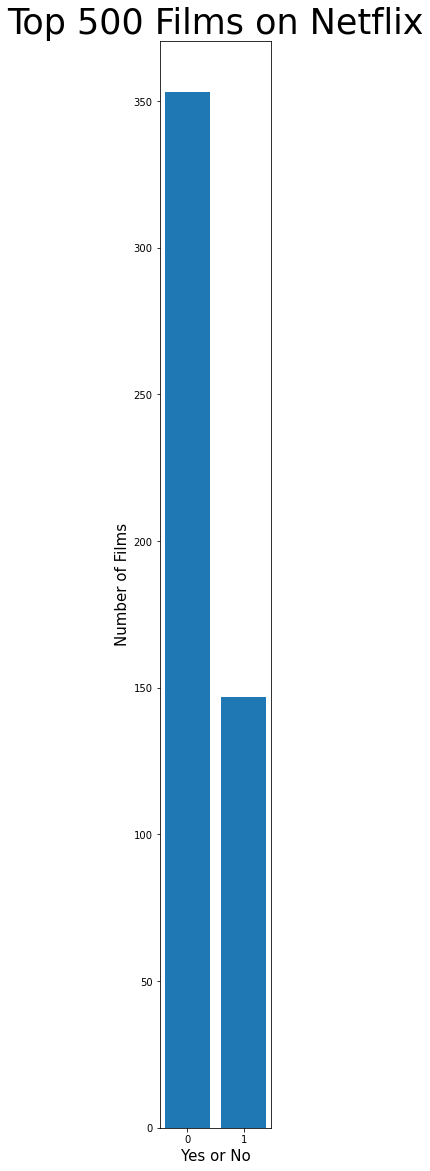

In [16]:
plot_two_fig, plot_two_ax = plt.subplots(figsize=(2,20))


plot_two_ax.bar(NetGraph.index, NetGraph.values)

# Add labels for x and y axes
plot_two_ax.set_xlabel('Yes or No', fontsize=15)
plot_two_ax.set_ylabel('Number of Films', fontsize=15)

# Add a title for the plot
plot_two_ax.set_title('Top 500 Films on Netflix', fontsize=35)

In [17]:
x = (NetGraph.index, HuluGraph.index, PrimeGraph.index,DisneyGraph.index)


In [18]:
y = ("0", "1", "0", "1", "0", "1", "0", "1")
y = (353, 147, 415, 85, 257, 243, 460, 40)
y

(353, 147, 415, 85, 257, 243, 460, 40)

<BarContainer object of 8 artists>

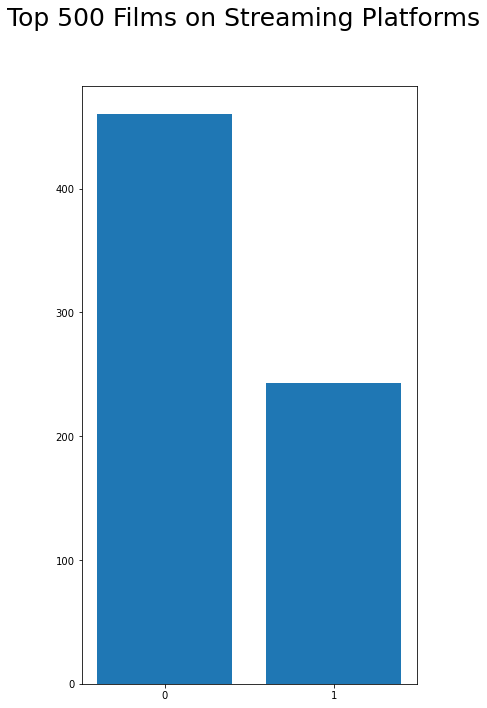

In [19]:
fig, ax = plt.subplots(figsize=(6, 11))
fig.suptitle('Top 500 Films on Streaming Platforms', fontsize=25)

x = ("0", "1", "0", "1", "0", "1", "0", "1")
y = [353, 147, 415, 85, 257, 243, 460, 40]

ax.bar(x,y)

<BarContainer object of 2 artists>

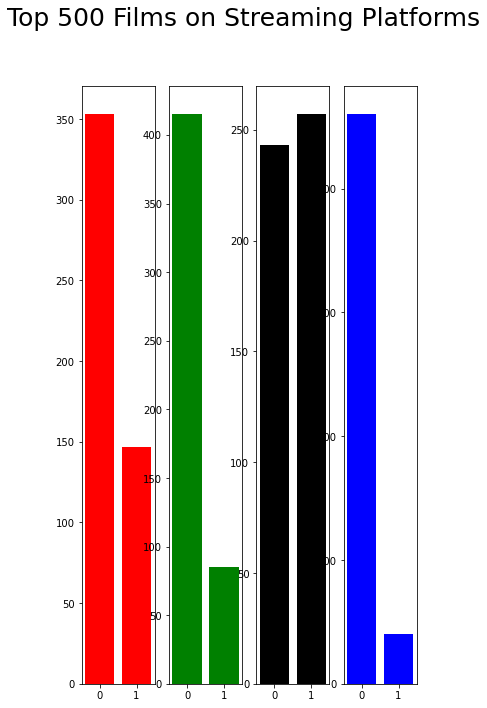

In [20]:
fig, axes = plt.subplots(figsize=(6, 11), ncols=4)
fig.suptitle('Top 500 Films on Streaming Platforms', fontsize=25)

axes[0].bar(NetGraph.index, NetGraph.values, color = 'red')
axes[1].bar(HuluGraph.index, HuluGraph.values, color = 'green')
axes[2].bar(PrimeGraph.index, PrimeGraph.values, color = 'black')
axes[3].bar(DisneyGraph.index, DisneyGraph.values, color = 'blue')




In [21]:
top_movies

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4663,4663,4664,Blow the Man Down,2019,18+,6.4,99%,0,0,1,0,0,"Bridget Savage Cole,Danielle Krudy","Comedy,Drama,Mystery",United States,English,91.0
4534,4534,4535,I Am Not Your Negro,2017,18+,7.8,99%,0,0,1,0,0,Raoul Peck,Documentary,"Switzerland,France,Belgium,United States","English,French",93.0
4466,4466,4467,The Wailing,2016,18+,7.5,99%,0,0,1,0,0,Hong-jin Na,"Horror,Mystery,Thriller","South Korea,United States","Korean,Japanese",156.0
4447,4447,4448,Lady Bird,2017,18+,7.4,99%,0,0,1,0,0,Greta Gerwig,"Comedy,Drama",United States,"English,Spanish",94.0
3584,3584,3585,Shoplifters,2018,18+,8.0,99%,0,1,0,0,0,Hirokazu Koreeda,"Crime,Drama",Japan,Japanese,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,3636,3637,Risky Business,1983,18+,6.8,92%,0,1,0,0,0,Paul Brickman,"Comedy,Crime,Drama,Romance",United States,"English,German",99.0
3689,3689,3690,The Absent One,2014,NaN,7.1,92%,0,1,0,0,0,Mikkel Nørgaard,"Crime,Mystery,Thriller","Denmark,Germany,Sweden","Danish,English,French",119.0
6601,6601,6602,The Window,2008,18+,6.7,92%,0,0,1,0,0,Ted Tetzlaff,"Drama,Film-Noir,Thriller",United States,English,73.0
5108,5108,5109,Stations of the Cross,2014,NaN,7.4,92%,0,0,1,0,0,Dietrich Brüggemann,Drama,"Germany,France","German,French,Latin",110.0


In [22]:
netflixrevenue = pd.read_csv('data/DataNetflixRevenue2020_V2.csv')
netflixrevenue.head()

,Area,Years,Revenue
0,United States and Canada,Q1 - 2018,1976157000
1,"Europe, Middle East and Africa",Q1 - 2018,886649000
2,Latin America,Q1 - 2018,540182000
3,Asia-Pacific,Q1 - 2018,199117000
4,United States and Canada,Q2 - 2018,2049546000


In [23]:
netflixsubscriber = pd.read_csv('data/DataNetflixSubscriber2020_V2.csv')
netflixsubscriber

,Area,Years,Subscribers
0,United States and Canada,Q1 - 2018,60909000
1,"Europe, Middle East and Africa",Q1 - 2018,29339000
2,Latin America,Q1 - 2018,21260000
3,Asia-Pacific,Q1 - 2018,7394000
4,United States and Canada,Q2 - 2018,61870000
5,"Europe, Middle East and Africa",Q2 - 2018,31317000
6,Latin America,Q2 - 2018,22795000
7,Asia-Pacific,Q2 - 2018,8372000
8,United States and Canada,Q3 - 2018,63010000
9,"Europe, Middle East and Africa",Q3 - 2018,33836000


In [24]:
NetflixsRevenue2 = pd.read_csv('data/NetflixsRevenue2018toQ2_2020.csv')
NetflixsRevenue2

,Area,Q1 - 2018,Q2 - 2018,Q3 - 2018,Q4 - 2018,Q1 - 2019,Q2 - 2019,Q3 - 2019,Q4 - 2019,Q1 - 2020,Q2 - 2020
0,United States and Canada,1976157000,2049546000,2094850000,2160979000,2256851000,2501199000,2621250000,2671908000,2702776000,2839670000
1,"Europe, Middle East, and Africa",886649000,975497000,1004749000,1096812000,1233379000,1319087000,1428040000,1562561000,1723474000,1892537000
2,Latin America,540182000,568071000,562307000,567137000,630472000,677136000,741434000,746392000,793453000,785368000
3,Asia-Pacific,199117000,221252000,248691000,276756000,319602000,349494000,382304000,418121000,483660000,569140000


In [25]:
tvshows = pd.read_csv('data/tv_shows.csv')
tvshows

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [26]:
tvshows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [27]:
tvshows = tvshows.dropna(subset = ['Rotten Tomatoes'])
tvshows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 5575
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1011 non-null   int64  
 1   Title            1011 non-null   object 
 2   Year             1011 non-null   int64  
 3   Age              931 non-null    object 
 4   IMDb             1008 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          1011 non-null   int64  
 7   Hulu             1011 non-null   int64  
 8   Prime Video      1011 non-null   int64  
 9   Disney+          1011 non-null   int64  
 10  type             1011 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 94.8+ KB


In [28]:
tvshows

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5509,5509,Diary of a Future President,2020,7+,5.5,100%,0,0,0,1,1
5517,5517,Encore!,2019,7+,7.4,68%,0,0,0,1,1
5522,5522,Spider-Man Unlimited,1999,7+,6.5,50%,0,0,0,1,1
5530,5530,The Super Hero Squad Show,2009,7+,6.1,50%,0,0,0,1,1


In [30]:
PrimeTV = tvshows['Prime Video'].value_counts()
NetflixTV = tvshows['Netflix'].value_counts()
HuluTV = tvshows['Hulu'].value_counts()
DisneyTV = tvshows['Disney+'].value_counts()

In [31]:
[PrimeTV, NetflixTV, HuluTV, DisneyTV]

[0    783
 1    228
 Name: Prime Video, dtype: int64,
 0    557
 1    454
 Name: Netflix, dtype: int64,
 0    636
 1    375
 Name: Hulu, dtype: int64,
 0    987
 1     24
 Name: Disney+, dtype: int64]

In [32]:
NetflixTV.values

array([557, 454])

In [ ]:
fig, ax = plt.subplots(figsize=(6, 11))
fig.suptitle('Top 1000 TV Shows on Streaming Platforms', fontsize=25)

x = ('Prime', 'Netflix', 'Hulu', 'Disney+' )
y = [228, 454, 375, 24]

ax.bar(x,y)

In [ ]:
fig, axes = plt.subplots(figsize=(6, 11), ncols=8)
fig.suptitle('Top 500 TV Shows on Streaming Platforms', fontsize=25)

axes[0].bar(NetflixTV.index, NetflixTV.values, color = 'red')
axes[1].bar(NetGraph.index, NetGraph.values, color = 'red')
axes[2].bar(HuluTV.index, HuluTV.values, color = 'green')
axes[3].bar(HuluGraph.index, HuluGraph.values, color = 'green')
axes[4].bar(PrimeTV.index, PrimeTV.values, color = 'black')
axes[5].bar(PrimeGraph.index, PrimeGraph.values, color = 'black')
axes[6].bar(DisneyTV.index, DisneyTV.values, color = 'blue')
axes[7].bar(DisneyGraph.index, DisneyGraph.values, color = 'blue')

In [ ]:
#Bring in Seaborn!!
#Clean this up!

import seaborn as sns
sns.set(style='darkgrid')
# Same as sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
netflixratings = pd.read_csv('data/netflixratings.csv')
netflixratings

In [ ]:
netflixratings

In [ ]:
huluratings = pd.read_csv('data/HuluRaw.csv')
huluratings

In [ ]:
#TVShow Data - figure out
#Helped Qiwen - filter data - catalog data, 
#Helped Mallory make multiple plots - searching and editing and searching and editing
